##### Author: Vincent Yeo

## Image Recognition with MNIST dataset

#### Background:

Handwritten documents are commonly used especially in forms handled by organizations like government agencies or banks etc with individuals. Despite increasing usage of digital platforms that handles online form submission, handwritten form are still a popular means of submission and more can be done to automate the process of form handling and digitalize such documents. One way is by enabling machines to identify chracters and numbers from such documents. This is of course challenging given the unique handwritting of each individuals. Thus the use of neural networks is necessary.

#### Dataset

The MNIST database contains 70000 images of handwritten digits from 0 to 9, a subset of the [NIST](https://www.nist.gov/srd/nist-special-database-19) database, that has been preprocessed in normalising size and centering of the image.

The authors have offer it to the world for machine learning and pattern recogrnition methods

From LeCun, Y., Cortes, C. & Burges, C. J. C (n.d.). THE MNIST DATABASE of handwritten digits. Retrieved from http://yann.lecun.com/exdb/mnist/

#### Task:
+ Classify the handwritten digits correctly.


In [19]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D 
from keras.utils import np_utils

import matplotlib.pyplot as plt     
import matplotlib.cm as cm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Explore the distribution of the train set
y_train_df = pd.DataFrame(y_train, columns=['label'])
graph_train = y_train_df['label'].value_counts()/len(y_train_df) * 100

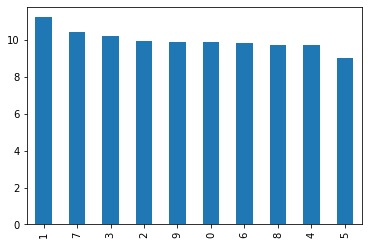

In [25]:
graph_train.plot(kind='bar')
# Almost uniform distribution of handwritten digits

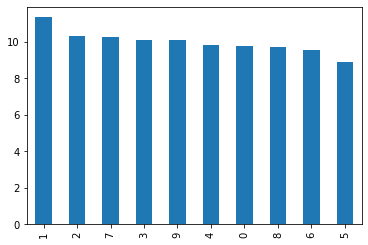

In [32]:
# Explore the distribution of the train set
y_test_df = pd.DataFrame(y_test, columns=['label'])
graph_test = y_test_df['label'].value_counts()/len(y_test_df) * 100
graph_test.plot(kind='bar')

# Test set has almost a uniform distribution

#### Basic Image Processing and Visualization

In [29]:
# To display original image and processed image
def displayImage(image, image_filter):
    im = X_train[image]
    width = im.shape[0]
    height = im.shape[1]
    imC = np.zeros((width-2, height-2))
    
    for row in range(1, width-1):
        for col in range(1, height-1):
            for i in range(len(image_filter[0])):
                for j in range(len(image_filter)):
                    imC[row-1][col-1] += im[row-1+i][col-1+j] * image_filter[i][j]
                
            if imC[row-1][col-1] > 255:
                imC[row-1][col-1] = 255
            elif imC[row-1][col-1] < 0:
                imC[row-1][col-1] = 0
            
    plt.imshow(im, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(imC/255, cmap=cm.Greys_r)
    plt.show()

In [30]:
# filters
blur = [
        [1/10,1/10,1/10],
        [1/10,1/10,1/10],
        [1/10,1/10,1/10],
]

edges = [
    [1, 1, 1],
    [1, -9, 1],
    [1, 1, 1]
]

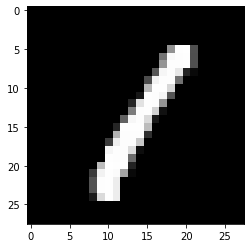

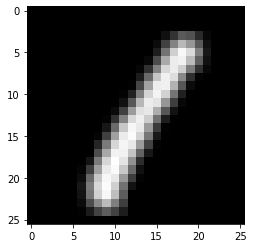

In [31]:
displayImage(3, blur)

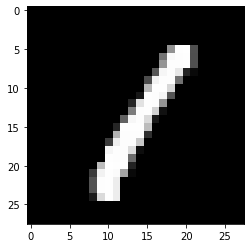

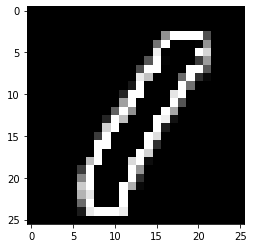

In [32]:
displayImage(3, edges)

In [3]:
# Size of the Training and Test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# convert 2d arrays into 1d
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# 10 classes for digits 0 to 9
classes = 10
Y_train = np_utils.to_categorical(y_train, classes)     
Y_test = np_utils.to_categorical(y_test, classes)

In [36]:
# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

epochs = 100
batch_size = 100

model = Sequential()     
model.add(Dense(100, input_shape=(784, ), activation='sigmoid'))     

# Hidden layers
model.add(Dense(100, activation='sigmoid'))

# Output Layers
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

history = model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, callbacks = [early_stopping])

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 97us/step - loss: 1.9213 - acc: 0.5490 - val_loss: 1.5730 - val_acc: 0.7416
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 1.3028 - acc: 0.7872 - val_loss: 1.0493 - val_acc: 0.8283
Epoch 3/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.8908 - acc: 0.8470 - val_loss: 0.7398 - val_acc: 0.8685
Epoch 4/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.6614 - acc: 0.8723 - val_loss: 0.5744 - val_acc: 0.8856
Epoch 5/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.5350 - acc: 0.8865 - val_loss: 0.4806 - val_acc: 0.8982
Epoch 6/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.4599 - acc: 0.8953 - val_loss: 0.4226 - val_acc: 0.9015
Epoch 7/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.4108 - acc: 0.9020 - val_loss: 0.3847 - 

The model achieved a 96.2% accuracy in classifying the handwritten digits

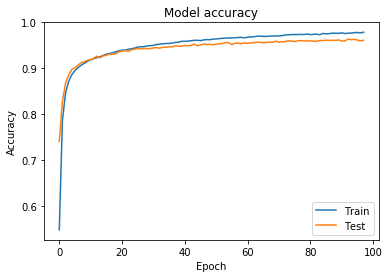

In [40]:
# Plot train vs test accuracy per epoch
plt.figure()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

The model accuracy increase sharply within 20 epoches to 90%.

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# model.save('mnist.h5')

In [8]:
from keras.models import load_model

my_model = load_model('mnist.h5')











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [67]:
from sklearn.metrics import classification_report

In [65]:
def evaluateClassifier(model, X_test, y_test):
    
    #round up the labels
    y_test_rounded = np.argmax(y_test, axis=1)
    
    y_pred = model.predict_classes(X_test)
    
    report = classification_report(y_test_rounded, y_pred)
    print(report)

    return report

In [66]:
report = evaluateClassifier(my_model, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.95      0.96      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



#### Results and Analysis:
The CNN has achieved a 96.2% test accuracy.

Based on each precision score, the model's prediction would be realised truely for 
+ the digit `0`, 97% of the time.
+ the digit `1`, 98% of the time.
+ the digit `2`, 97% of the time.
+ the digit `3`, 95% of the time.
+ the digit `4`, 96% of the time.
+ the digit `5`, 95% of the time.
+ the digit `6`, 96% of the time.
+ the digit `7`, 95% of the time.
+ the digit `8`, 96% of the time.
+ the digit `9`, 96% of the time.

Based on each recall score, the model's prediction for
+ the digit `0` has about 99% being correct.
+ the digit `1` has about 99% being correct.
+ the digit `2` has about 95% being correct.
+ the digit `3` has about 96% being correct.
+ the digit `4` has about 96% being correct.
+ the digit `5` has about 96% being correct.
+ the digit `6` has about 97% being correct.
+ the digit `7` has about 95% being correct.
+ the digit `8` has about 95% being correct.
+ the digit `9` has about 94% being correct.

Based on each f1 score, the weighted average of the precision and recall for
+ the digit `0` is 98%
+ the digit `1` is 98%
+ the digit `2` is 96%
+ the digit `3` is 95%
+ the digit `4` is 96%
+ the digit `5` is 95%
+ the digit `6` is 97%
+ the digit `7` is 95%
+ the digit `8` is 95%
+ the digit `9` is 95%

#### Future Works:
+ A form would have more than just digit, so more can be done in building a CNN that can recognize characters too
+ Position of the character and digits is also important in identifying what fields is that entry associated to. The model would need to identify and sieve out the form fields associated to the handwritten values.
+ This would increase the complexity of the model and perhaps separate specialised models can be built to handle the task better.